In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as ny

In [4]:
data= pd.read_csv("churn_customer.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data["TotalCharges"]=data["TotalCharges"].replace(" ","0")
data["TotalCharges"]=data["TotalCharges"].astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
data.isnull().sum().sum()

0

In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
data.duplicated().sum()

0

In [14]:
data["customerID"].duplicated().sum()

0

# we have converted the seniorCitizen value from 0 or 1 to yes or no 

In [23]:
def convert(value):
    if value==1:
      return "YES"
    else:
      return "NO"


data["SeniorCitizen"]=data["SeniorCitizen"].apply(convert)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
data.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,NO,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,NO,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,NO,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,NO,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,NO,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


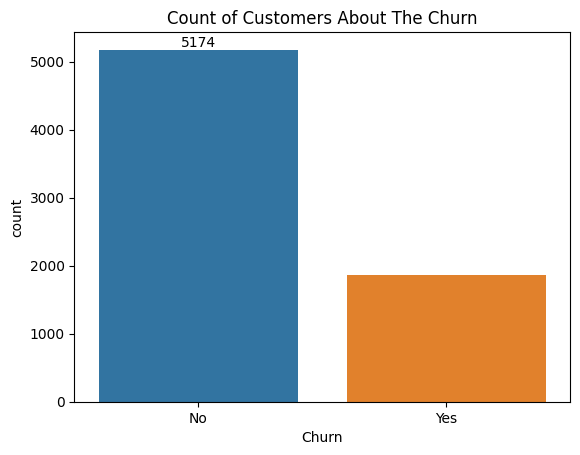

In [71]:
ax=sns.countplot(x=data["Churn"],data=data,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers About The Churn")
plt.show()

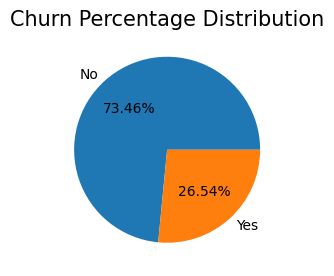

In [43]:
gb=data.groupby("Churn").agg({"Churn":"count"})
gb
plt.figure(figsize=(3,4))
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Churn Percentage Distribution",fontsize=15)
plt.show()

#from the given pie chart 26.54 % of our customers are churn out
#now let's explore the reason behind it

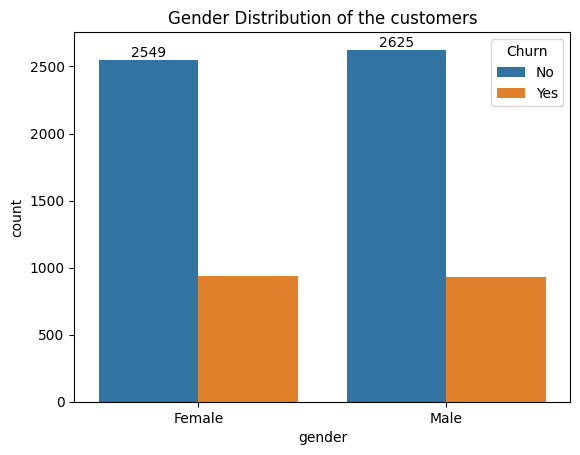

In [70]:
ax=sns.countplot(x=data["gender"],data=data,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution of the customers")
plt.show()

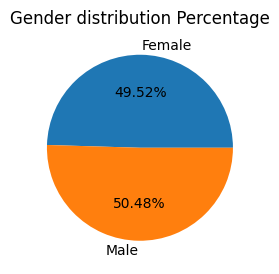

In [72]:
gb1=data.groupby("gender").agg({"gender":"count"})
gb1
plt.figure(figsize=(3,4))
plt.pie(gb1["gender"],labels=gb1.index,autopct="%1.2f%%")
plt.title("Gender distribution Percentage")
plt.show()

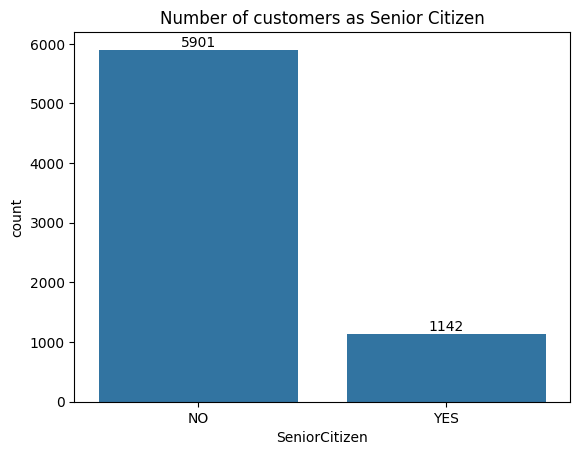

In [82]:
ax=sns.countplot(x=data["SeniorCitizen"],data=data)
ax.bar_label(ax.containers[0])
plt.title("Number of customers as Senior Citizen")
plt.show()

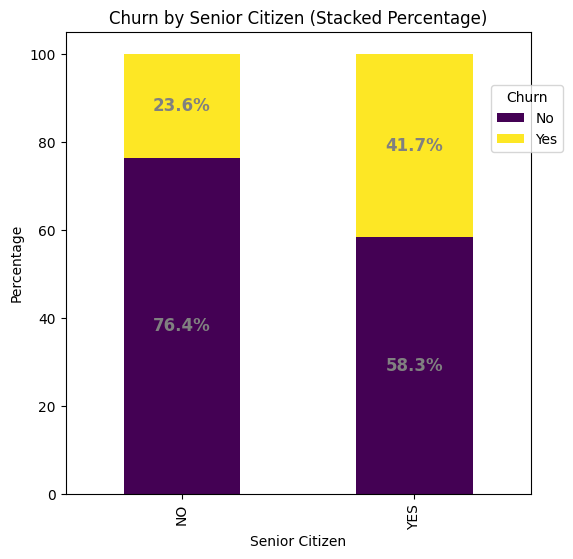

In [87]:
cross_tab = pd.crosstab(data["SeniorCitizen"], data["Churn"], normalize="index") * 100

# Plot a stacked bar chart
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(6, 6), colormap="viridis")

# Label bars with percentage values
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", color="grey", fontsize=12, weight="bold")

plt.title("Churn by Senior Citizen (Stacked Percentage)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn",bbox_to_anchor=(0.9,0.9))
plt.show()

#comparatively a greater number of people are senior citizen who have churned out

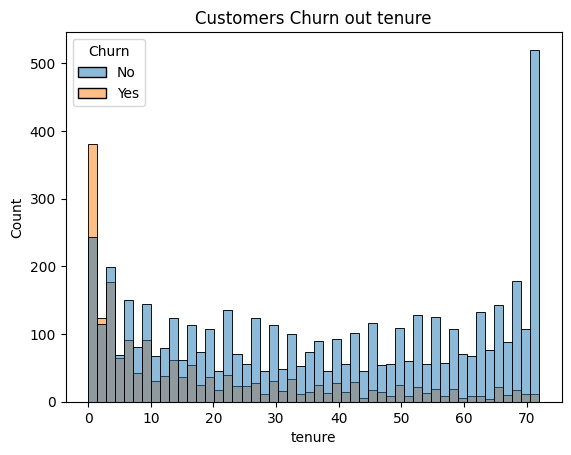

In [93]:
sns.histplot(x="tenure",data=data,bins=50,hue="Churn")
plt.title("Customers Churn out tenure")
plt.show()

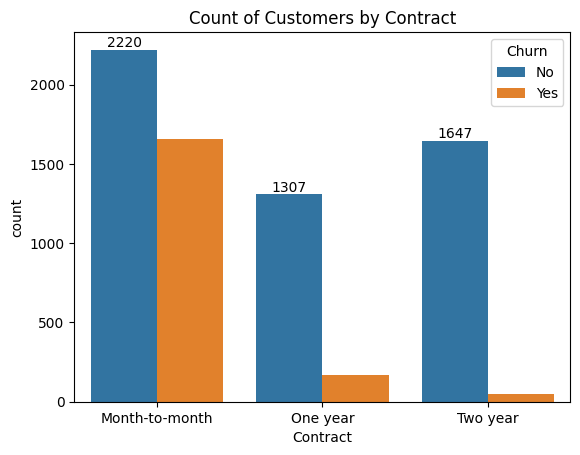

In [97]:
ax=sns.countplot(x=data["Contract"],data=data,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

# people who have month to month contract are likely to churn than one or two year contract

In [98]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

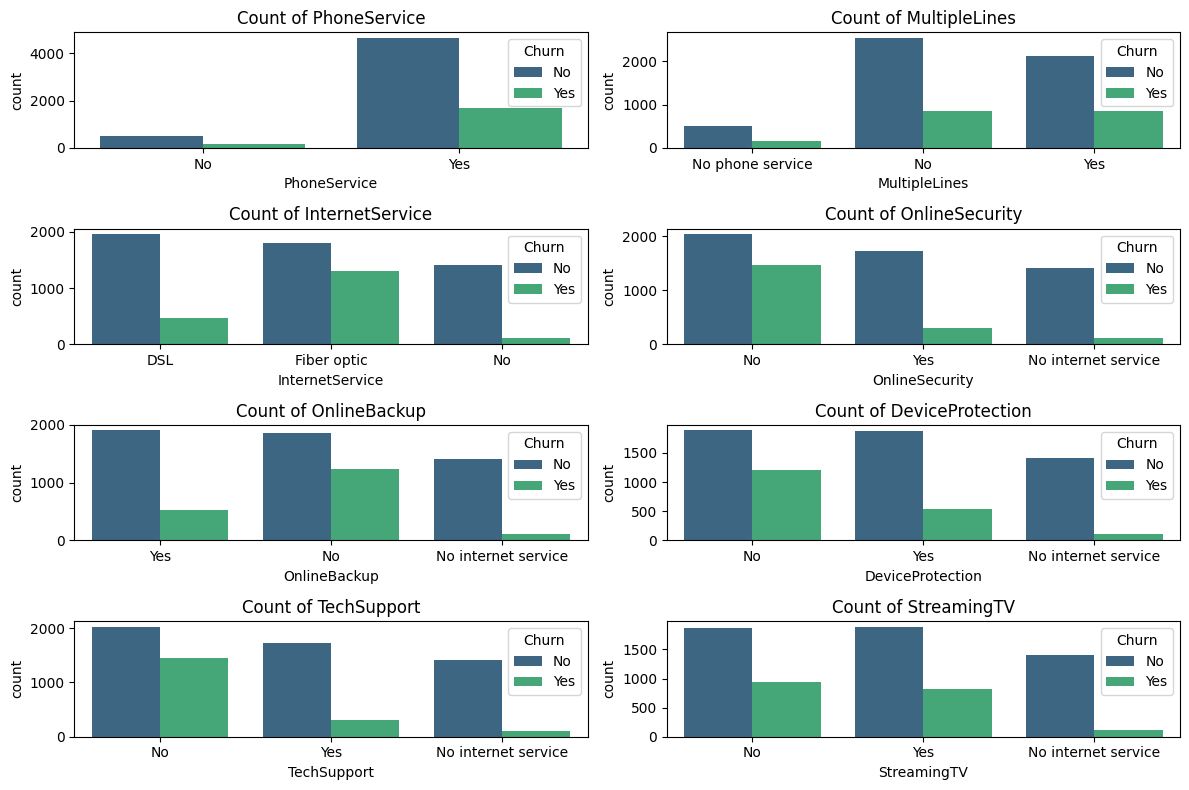

In [100]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV']

# Define the number of rows and columns for subplots
num_cols = 2  # Number of columns in the subplot grid
num_rows = (len(columns) + 1) // num_cols  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot count plots for each column
for i, col in enumerate(columns):
    sns.countplot(x=data[col], ax=axes[i], palette="viridis",hue=data["Churn"])
    axes[i].set_title(f"Count of {col}")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

 #Customers who do not have additional services like Online Security, Tech Support, and Device Protection tend to have higher churn rates. Fiber optic users have a higher churn rate compared to DSL users. In general, customers with fewer services (e.g., no internet or no additional add-ons) appear more likely to churn.

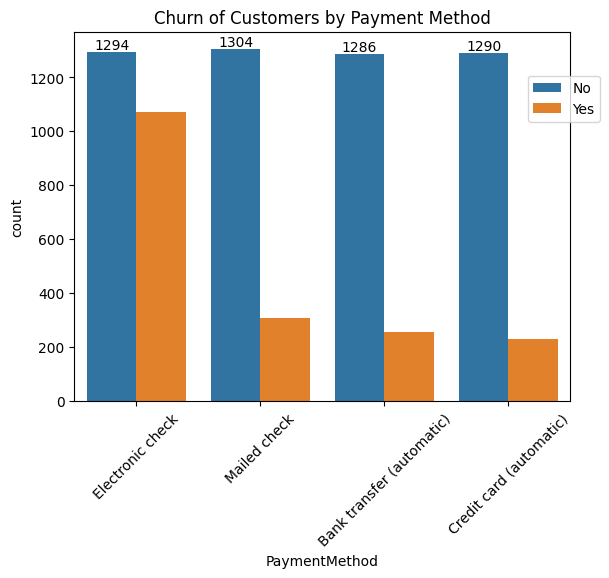

In [105]:
ax=sns.countplot(x=data["PaymentMethod"],data=data,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn of Customers by Payment Method")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(0.9,0.9))
plt.show()

#customer is likely to churn when he is using electronic check method